<a href="https://colab.research.google.com/github/uruenariobo/ai4eng_health_issues/blob/main/01%20-%20Exploraci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patient Survival Prediction

Importar el dataset empleado

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)

# from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold
import xgboost as xgb
from xgboost import XGBClassifier

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# import shap

pd.set_option('display.max_rows', 250)


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!echo '{"username":"gaiaramirezhincapie","key":"b2aa779bb3673bd4974ed05af3a8fb0d"}' > /root/.kaggle/kaggle.json

! kaggle datasets download mitishaagarwal/patient

100% 8.30M/8.30M [00:00<00:00, 81.6MB/s]
100% 8.30M/8.30M [00:00<00:00, 81.2MB/s]


In [ ]:
! unzip patient.zip

Archive:  patient.zip
  inflating: dataset.csv             


**1. Lectura**

In [ ]:
!kaggle datasets download -d mitishaagarwal/patient

# Function to download and extract files from a zip url
!unzip '/content/ashrae-energy-prediction.zip'

df=pd.read_csv("/content/dataset.csv")

patient.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open /content/ashrae-energy-prediction.zip, /content/ashrae-energy-prediction.zip.zip or /content/ashrae-energy-prediction.zip.ZIP.


1.1. Tamaño del dataset seleccionado

In [ ]:
df.shape

(91713, 85)

1.2. Visualizacion inicial

In [ ]:
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


1.3. Realizamos el proceso de filtrado identificado en el notebook principal (02 - Patient Survival Prediction.ipynb)

In [ ]:
df = df.drop(['Unnamed: 83'], axis = 1)

In [ ]:
df.drop(['encounter_id','patient_id', 'icu_admit_source','icu_id', 'icu_stay_type', 'icu_type'], axis = 1, inplace = True)


In [ ]:
df.drop(['hospital_id','apache_2_diagnosis','apache_3j_diagnosis','apache_4a_hospital_death_prob','apache_4a_icu_death_prob','apache_2_bodysystem','apache_3j_bodysystem'], axis = 1, inplace = True)


In [ ]:
df = df[df[['bmi','age', 'weight', 'height']].isna().sum(axis=1) == 0]
df

,age,bmi,elective_surgery,ethnicity,gender,height,pre_icu_los_days,weight,apache_post_operative,arf_apache,...,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,68.0,22.730000,0,Caucasian,M,180.3,0.541667,73.9,0,0.0,...,3.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,77.0,27.420000,0,Caucasian,F,160.0,0.927778,70.2,0,0.0,...,3.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,25.0,31.950000,0,Caucasian,F,172.7,0.000694,95.3,0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,81.0,22.640000,1,Caucasian,F,165.1,0.000694,61.7,1,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,67.0,27.560000,0,Caucasian,M,190.5,0.000694,100.0,0,0.0,...,3.7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91706,54.0,19.770448,0,Native American,M,177.8,0.025694,62.5,0,0.0,...,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91708,75.0,23.060250,0,Caucasian,M,177.8,0.298611,72.9,0,0.0,...,4.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
91709,56.0,47.179671,0,Caucasian,F,183.0,0.120139,158.0,0,0.0,...,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
91710,48.0,27.236914,0,Caucasian,M,170.2,0.046528,78.9,0,0.0,...,3.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,age,bmi,elective_surgery,height,pre_icu_los_days,weight,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,...,d1_potassium_min,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,...,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000,62498.000000
mean,62.472959,29.311804,0.163125,169.755619,0.828758,84.467912,0.179990,0.030145,3.430478,5.448702,...,3.933218,0.000992,0.017873,0.236536,0.014976,0.029025,0.007792,0.004224,0.022129,0.083747
std,16.711922,8.338388,0.369483,10.753338,2.491714,25.132315,0.384182,0.170987,0.970421,1.301969,...,0.582711,0.031481,0.132489,0.424958,0.121460,0.167878,0.087930,0.064856,0.147103,0.277010
min,16.000000,14.844926,0.000000,137.200000,-0.244444,38.600000,0.000000,0.000000,1.000000,1.000000,...,2.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.717173,0.000000,162.560000,0.036806,67.130000,0.000000,0.000000,3.000000,6.000000,...,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65.000000,27.780921,0.000000,170.100000,0.137847,80.800000,0.000000,0.000000,4.000000,6.000000,...,3.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,33.098092,0.000000,177.800000,0.393750,97.500000,0.000000,0.000000,4.000000,6.000000,...,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,89.000000,67.814990,1.000000,195.590000,159.090972,186.000000,1.000000,1.000000,4.000000,6.000000,...,5.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**2. Análisis de la variable objetivo**

Distribución de la variable "hospital_death"



<Axes: ylabel='Density'>

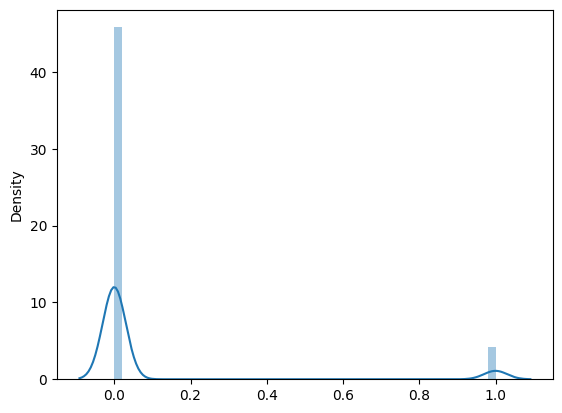

In [ ]:
sns.distplot([df['hospital_death'].astype(float)])

Tras el proceso de filtracion realizado, la cantidad de personas que sobrevivieron fue de:

In [ ]:
df.hospital_death.value_counts()

0    57264
1     5234
Name: hospital_death, dtype: int64

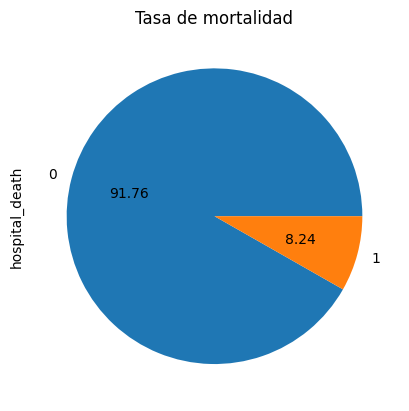

In [ ]:
_=df.hospital_death.value_counts().plot(kind='pie',autopct="%.2f",title ='Tasa de mortalidad')

**3. Matriz de correlacion**

In [ ]:
corr_matrix = df.corr()

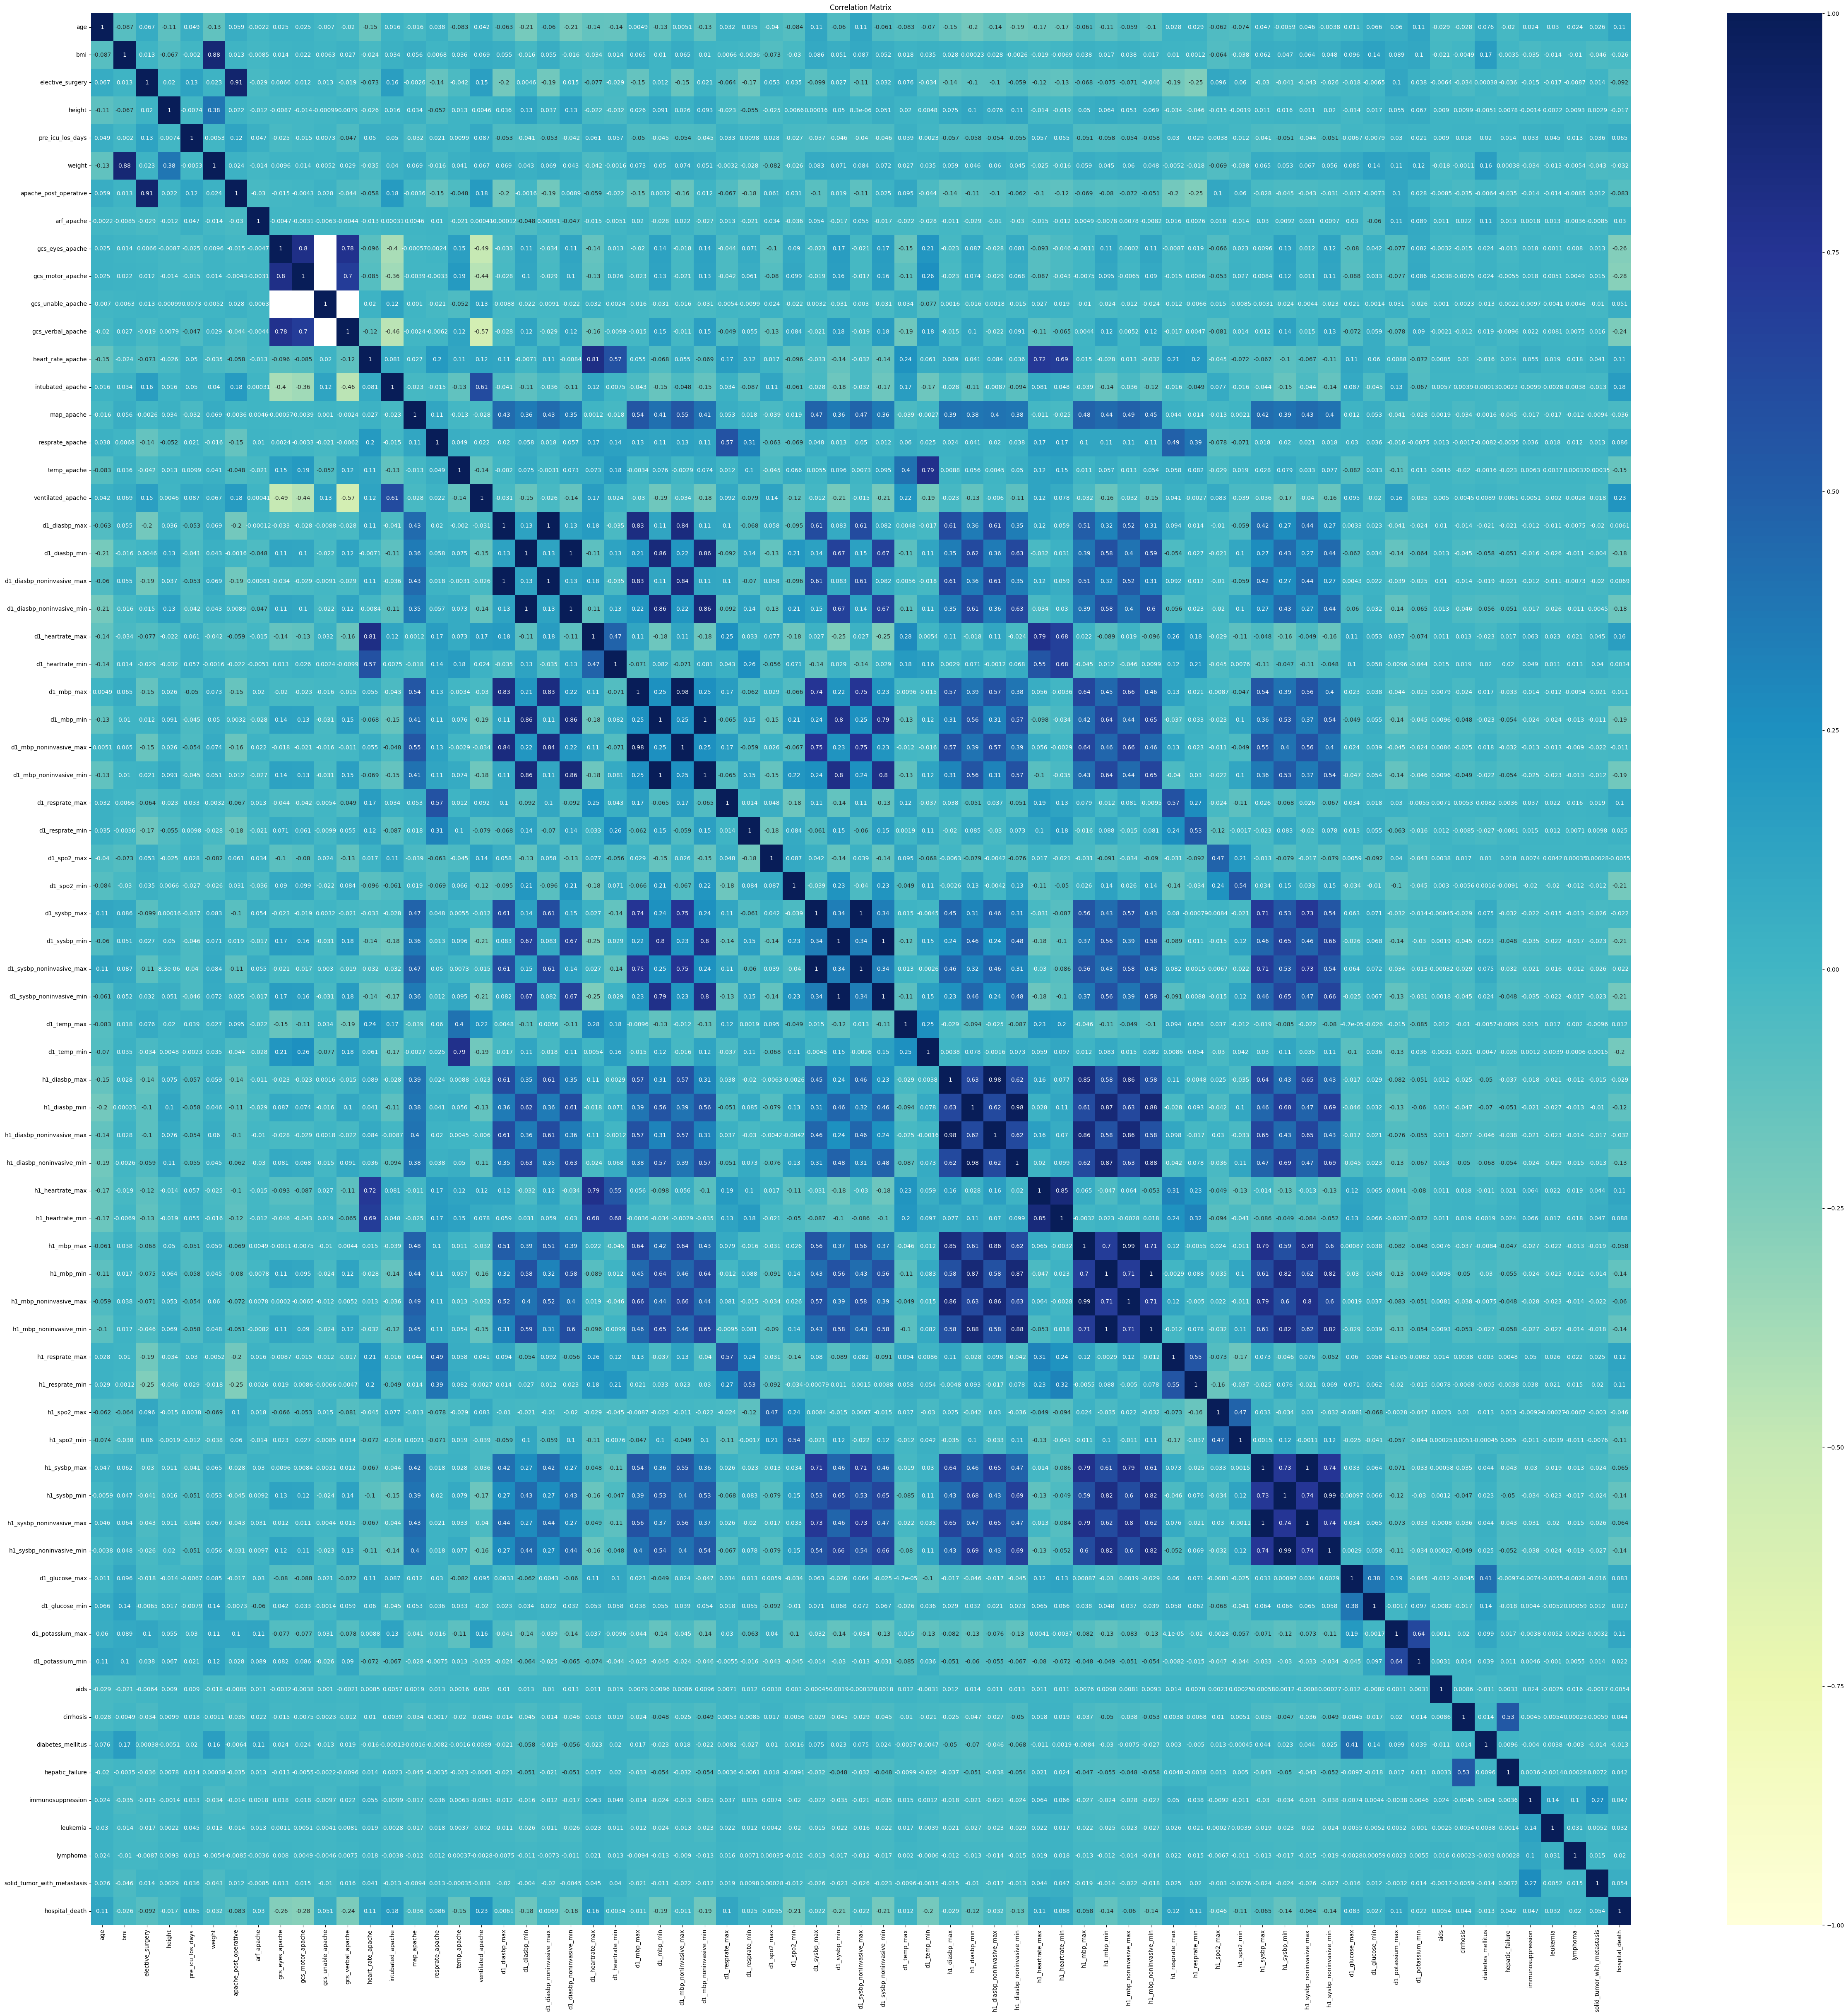

In [ ]:
plt.figure(figsize=(60,60))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

**4. Distribución de las variables numéricas**

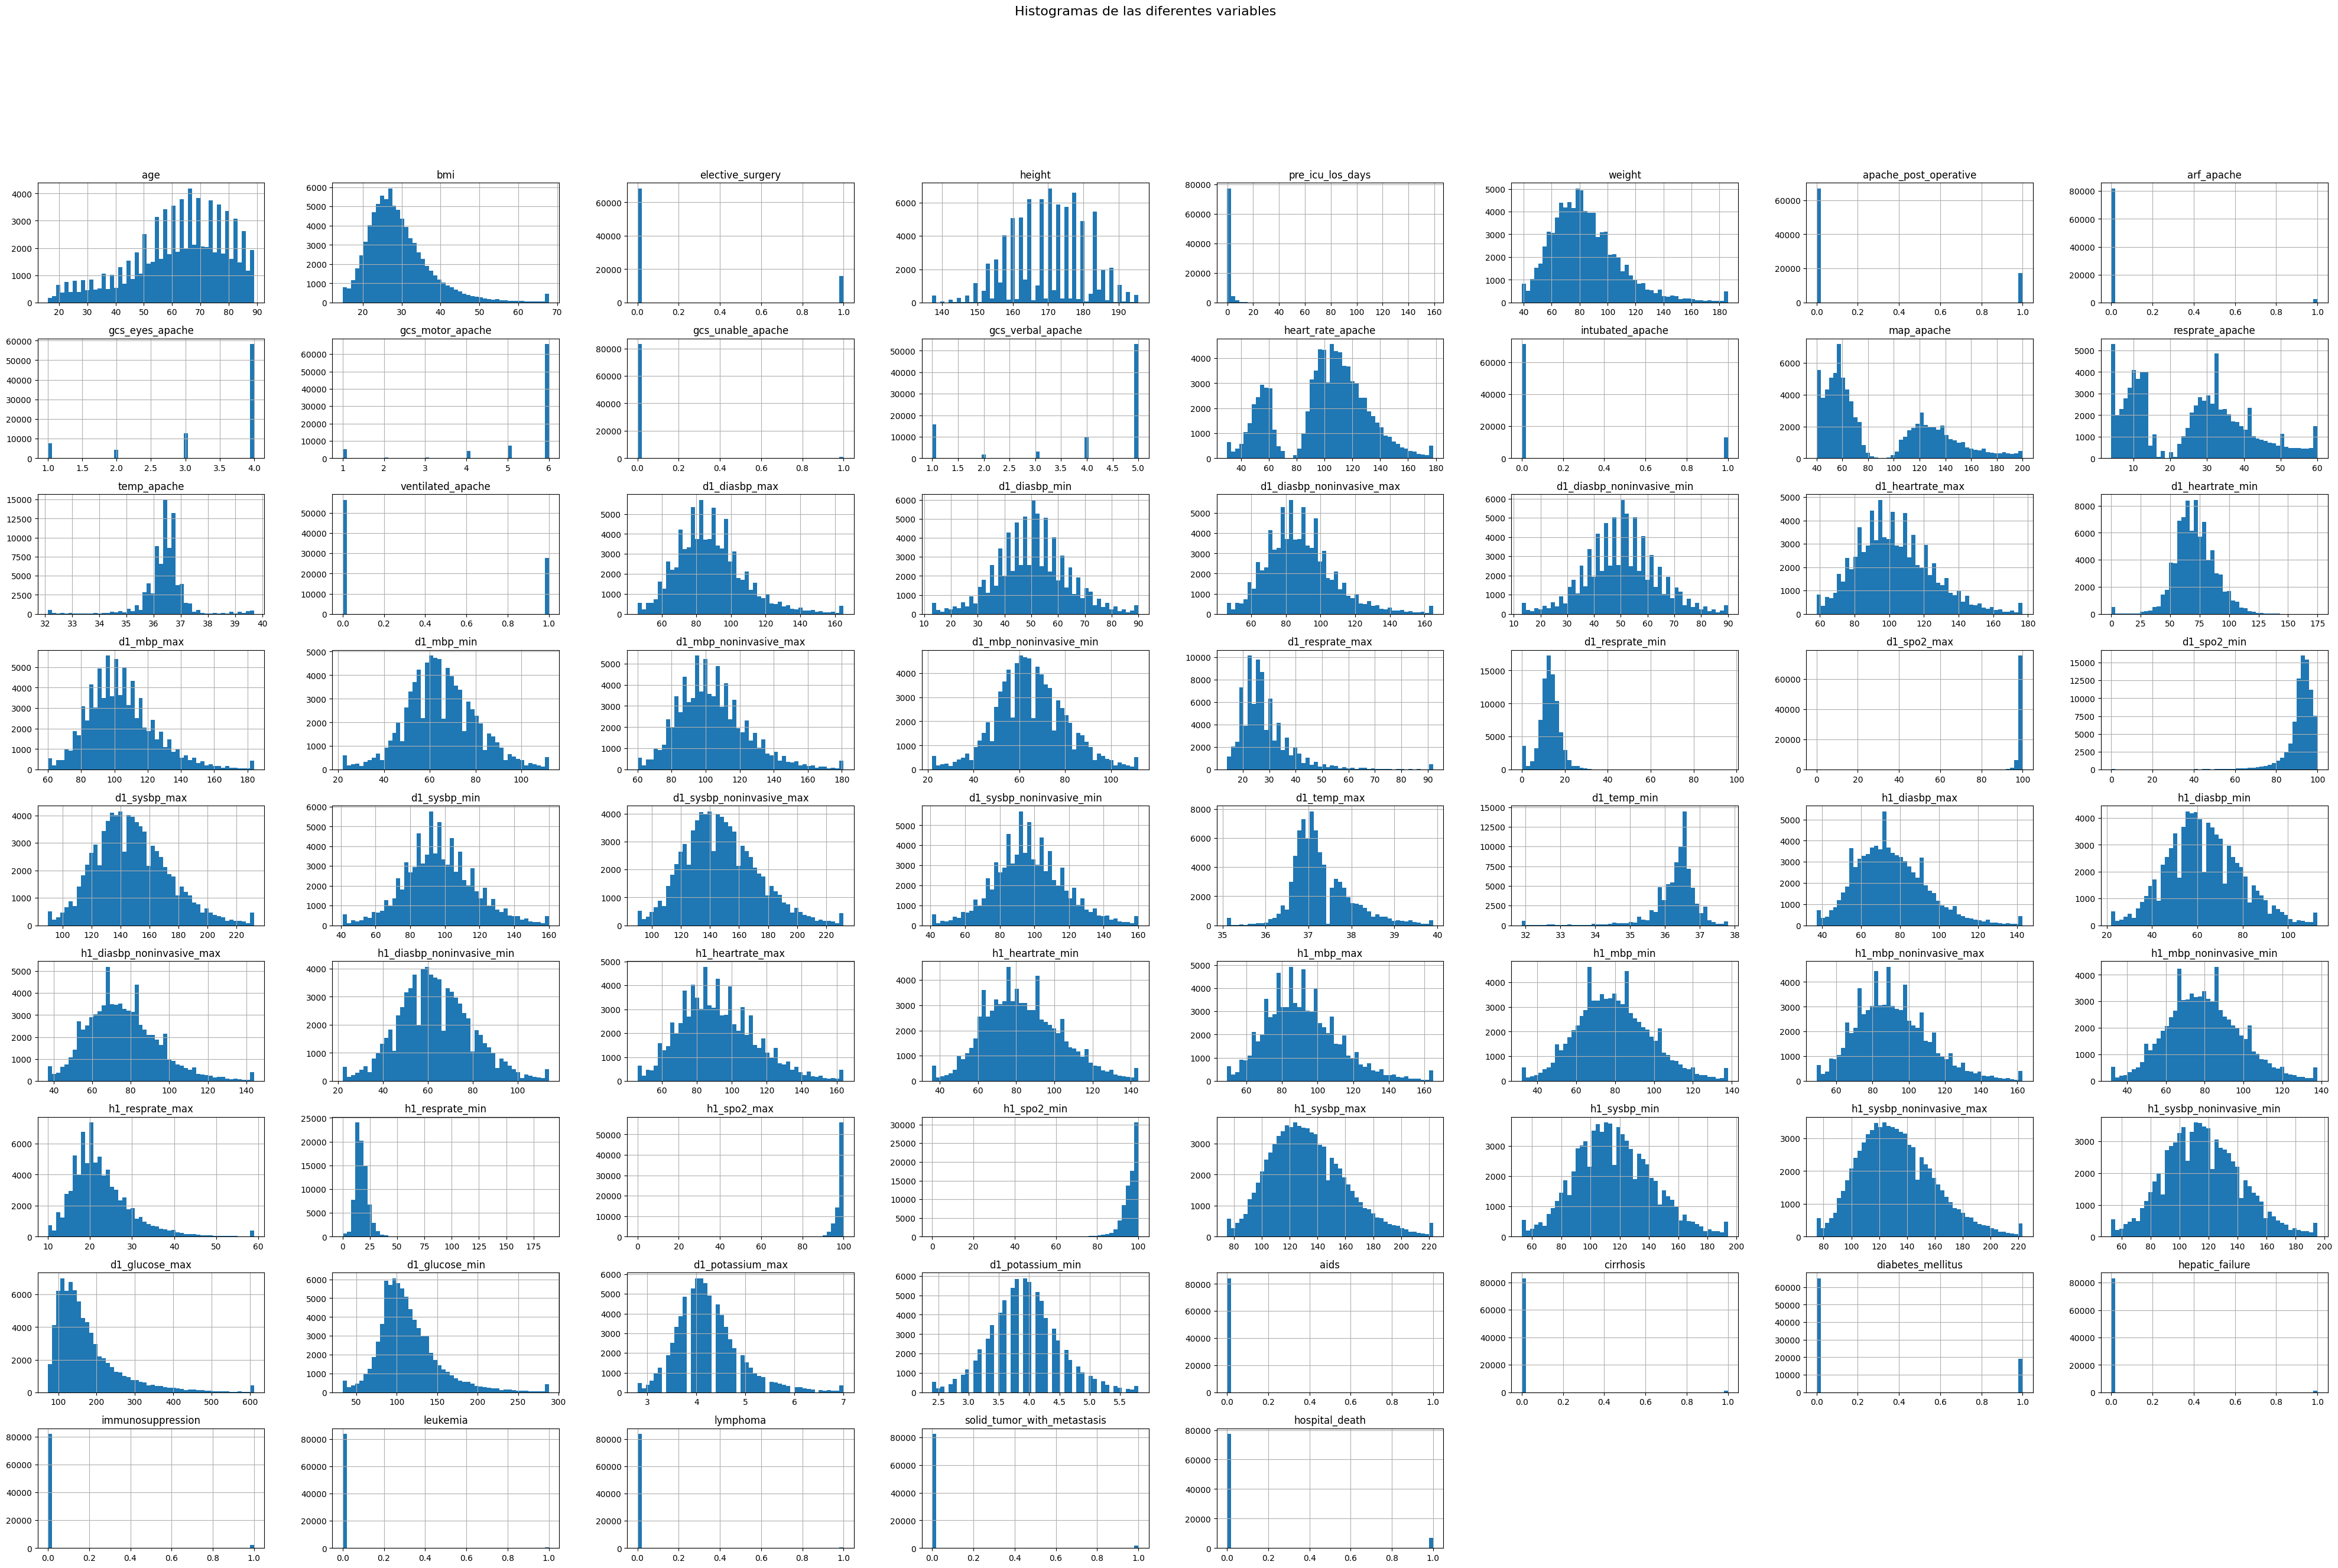

In [ ]:
df.hist(bins=50, figsize=(50,30))
plt.suptitle('Histogramas de las diferentes variables', fontsize=16)
plt.show()